<a href="https://colab.research.google.com/github/lmillana/MasterProjects/blob/main/Machine%20Learning/Detecci%C3%B3n%20Fraude%20con%20Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

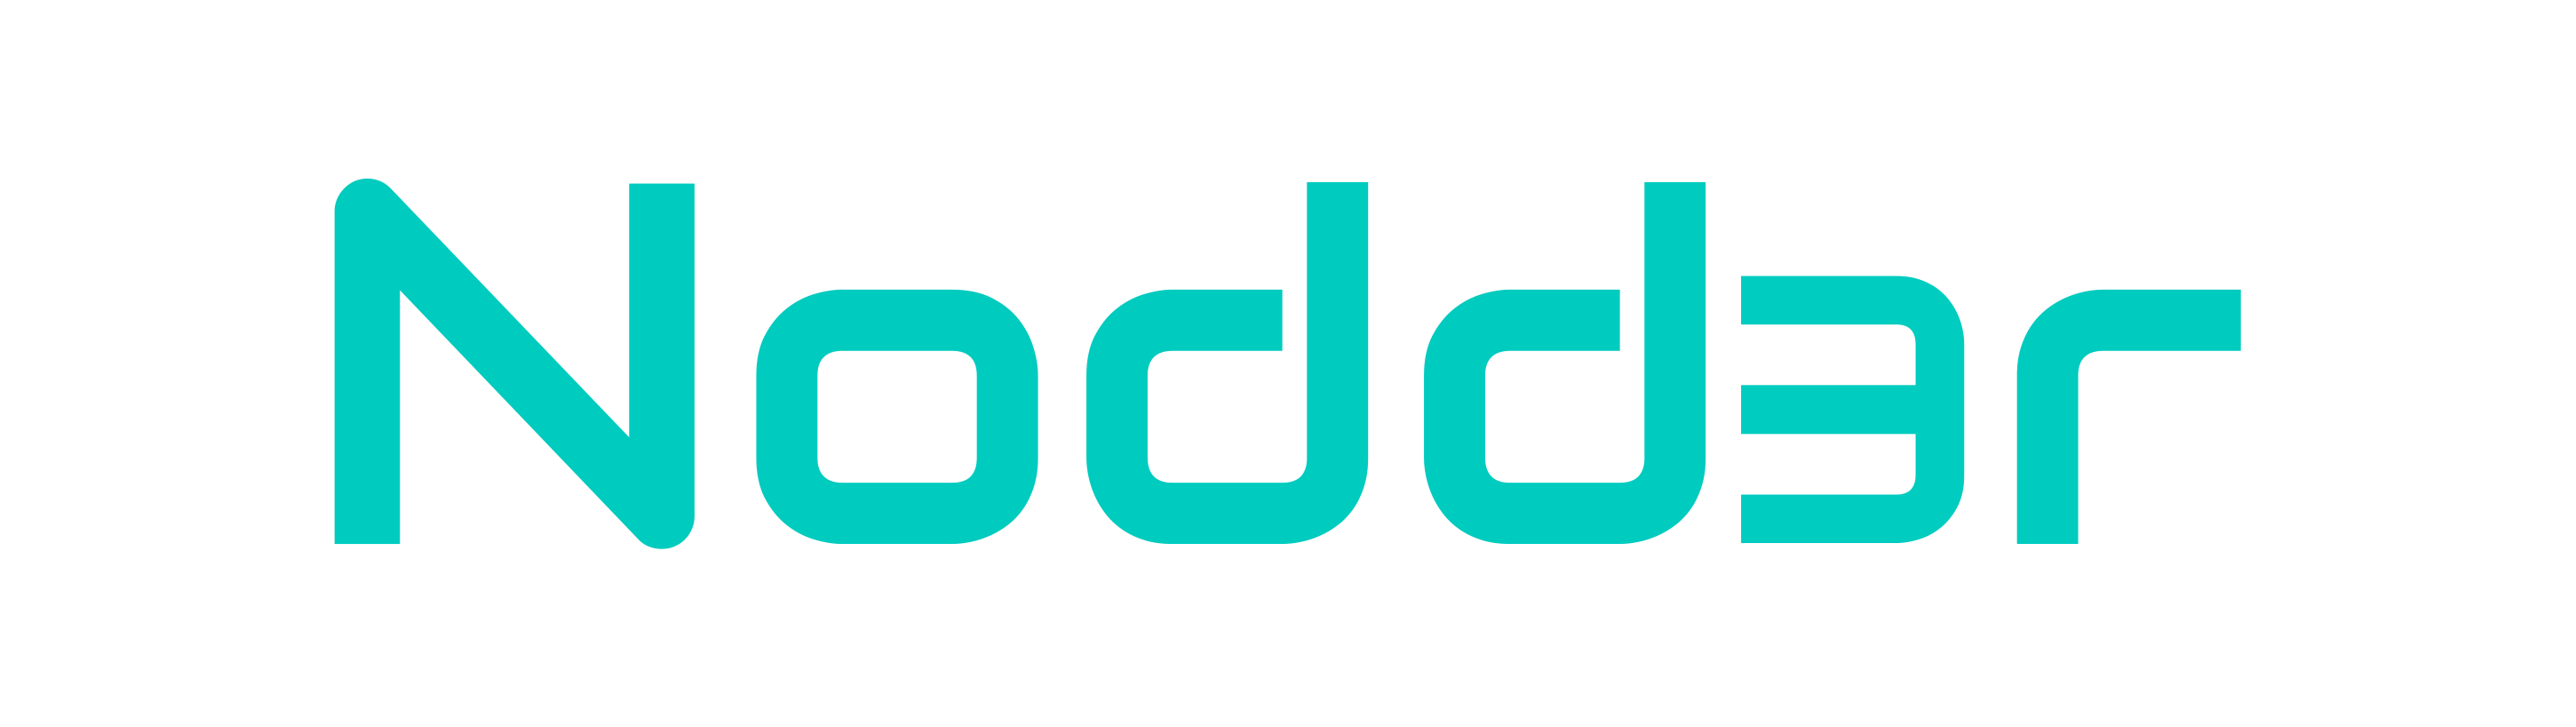



Información de Copyright Copyright 2023 Nodd3r. Todos los derechos reservados

Licencia bajo MIT License. No podrás usar este archivo excepto de acuerdo con la licencia. Antes de usar este código crea una copia en tu Drive.

© Nodd3r: https://nodd3r.com


[[DL] Proyecto Deep Learning con Keras](https://colab.research.google.com/drive/1FKOA3gfVQ_WgKXRurBkSw0kOkTnynNd1#scrollTo=jT9BWwKomTw_)

# **Detección de fraude de tarjetas de crédito**

En este proyecto se utilizarán datos de pagos online procedentes de tarjetas de crédito.

Se han obtenido diferentes parámetros de cada pago online, clasificados en fraudulento o no fraudulento.

El objetivo de este proyecto es crear un clasificador automático mediante deep learning que, dado un pago online, lo clasifique como fraudulento o no fraudulento.

Los datos puedes descargarlos en el siguiente enlace:

[Descargar datos de crédito](https://drive.google.com/file/d/18kGGxCUjFgu-evYdDgdo8on47S5x58e7/view)

Llegados a este punto, no será necesario que asistamos el proyecto, verdad?

Por lo que todo el trabajo de instalar e importar librerías, obtener datos, tratarlos, procesarlos, visualizarlos, entrenar la red neuronal con Keras, y medirla, tendrás que realizarlos.

Una vez tengas el proyecto completo, envíanos la solución por correo para que te devolvamos el token.

In [ ]:
# Instalamos tensorflow
!pip install tensorflow

In [ ]:
## LIBRERIAS NECESARIAS:

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers #capas
from keras import models #modelos


In [ ]:
## OBTENER Y PREPARAR DATOS
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df.dropna(inplace=True) #Eliminamos valores nulos

In [ ]:
df['Class'].value_counts() #fraudulento o no

Class
0.0    231344
1.0       421
Name: count, dtype: int64

In [ ]:
## DATOS MUY DESBALANCEADOS -- UPSAMPLING
from sklearn.utils import resample

class_1 = df[df['Class'] == 1] #421
class_0 = df[df['Class'] == 0] #231344

df_upsampled = resample(class_0,
                        replace=True,     # Muestras con reemplazo
                        n_samples=len(class_1),    # Número de muestras igual al de la clase mayoritaria
                        random_state=123) # Para reproducibilidad


# Combinar los datos de nuevo
df_upsampled = pd.concat([class_1, df_upsampled])

In [ ]:
df_upsampled['Class'].value_counts()

Class
1.0    421
0.0    421
Name: count, dtype: int64

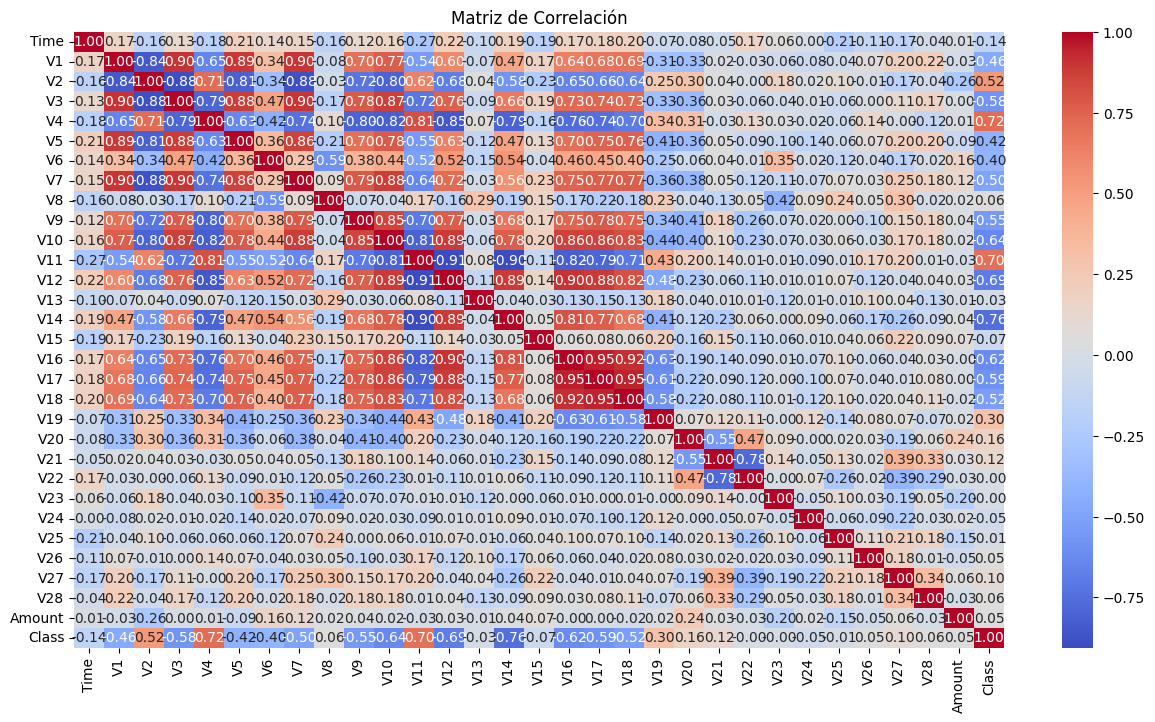

In [ ]:
##MIRAMOS LA CORRELACION
# Para ver si podemos eliminar alguna columna:

import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 8))
sns.heatmap(df_upsampled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
## DIVIDIMOS X e y

# Time no aporta mucho; Amount lo tengo en duda
X = df_upsampled.drop(columns=['Time','Amount', 'Class'], axis=1)
y = df_upsampled['Class']

In [ ]:
## VARIABLES CATEGÓRICAS (no numéricas) - Codificación
# OneHotEncoder, LabelBinarizer o pd.get_dummies()

In [ ]:
## VARIABLES NUMÉRICAS - Escalado
# MinMaxScaler o StandardScaler

from sklearn import preprocessing

# Escalado de X
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
## DEFINIR TRAIN & TEST con KERAS
# Entrenar con los de entrenamiento y con ellos medir el error en la parte de validación:
X_val = X.sample(frac=0.2, random_state=1337)
X_train = X.drop(X.index)

y_val = y.sample(frac=0.2, random_state=1337)
y_train = y.drop(y.index)

# Nos deberíamos quedar con otra porción para test o incluir nuevos valores

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [ ]:
## CONSTRUIR EL MODELO
model = models.Sequential() #Por ser simple, aplicamos secuencial (una capa tras otra)

## A PARTIR DE AQUI: AÑADIR CAPAS
model.add(layers.Dense(32, activation='relu')) #Capa conectada (Dense) con función de activación ReLU
model.add(layers.Dropout(0.5)) #Regularización: drop-out del 50%
#Se pueden incluir tantas capas como se quiera/necesite
model.add(layers.Dense(64, activation='relu')) #Capa conectada (Dense) con función de activación ReLU
model.add(layers.Dropout(0.5)) #Regularización: drop-out del 50%
model.add(layers.Dense(1, activation='sigmoid')) #Capa final -salida(1)- con función de activación Sigmoide
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
#compile(algoritmo de optimización, función de coste)

In [ ]:
## CLASS_WEIGHT
# para sacar el class_weight
# dándole pesos para que se centre más en la clase minoritaria y así equipararla

total = len(y_train)
pos = np.sum(y_train == 1)
neg = np.sum(y_train == 0)

weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}


In [ ]:
## ENTRENAMIENTO DE LA RED NEURONAL

history = model.fit(X_train,
                    y_train,
                    epochs=50, #iteraciones
                    batch_size=512, #tamaño del lote
                    validation_data=(X_val, y_val),
                    class_weight=class_weight)

# A medida de que avanzan las epochs, el coste se minimiza (loss & val_loss)
# y aumenta el val_accuracy

Epoch 1/50
2/2 [==============================] - 3s 259ms/step - loss: 0.9024 - accuracy: 0.4929 - val_loss: 0.7405 - val_accuracy: 0.5683
Epoch 2/50
2/2 [==============================] - 0s 60ms/step - loss: 0.9060 - accuracy: 0.5195 - val_loss: 0.6920 - val_accuracy: 0.6223
Epoch 3/50
2/2 [==============================] - 0s 51ms/step - loss: 0.7482 - accuracy: 0.5816 - val_loss: 0.6517 - val_accuracy: 0.6475
Epoch 4/50
2/2 [==============================] - 0s 43ms/step - loss: 0.7384 - accuracy: 0.6046 - val_loss: 0.6170 - val_accuracy: 0.6763
Epoch 5/50
2/2 [==============================] - 0s 46ms/step - loss: 0.7634 - accuracy: 0.5550 - val_loss: 0.5879 - val_accuracy: 0.7014
Epoch 6/50
2/2 [==============================] - 0s 64ms/step - loss: 0.7051 - accuracy: 0.6152 - val_loss: 0.5632 - val_accuracy: 0.7482
Epoch 7/50
2/2 [==============================] - 0s 43ms/step - loss: 0.6432 - accuracy: 0.6348 - val_loss: 0.5419 - val_accuracy: 0.7626
Epoch 8/50
2/2 [==========

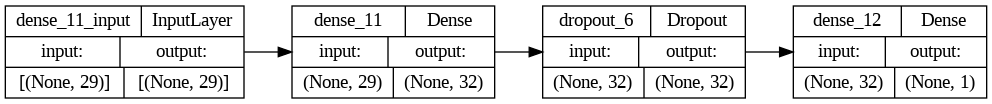

In [ ]:
## VISUALIZAMOS NUESTRO MODELO
keras.utils.plot_model(model, show_shapes=True, rankdir='LR')

In [ ]:
## OPTIMIZACIÓN DEL MODELO
# Cambiar la anchura de la capa y el número de capas
# Epochs

In [ ]:
# @title EVALUACION DEL MODELO

loss, accuracy = model.evaluate(X_val, y_val)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.2f}")

9/9 [==============================] - 0s 4ms/step - loss: 0.3385 - accuracy: 0.8813
Loss: 0.3385, Accuracy: 0.88


In [ ]:
# MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix

# Es necesario tener el modelo predicho para poder evaluarlo
y_pred = model.predict(X_val)
binary_predictions = [1 if p > 0.5 else 0 for p in y_pred]

confusion_matrix(y_val, binary_predictions)

9/9 [==============================] - 0s 3ms/step


array([[136,   0],
       [ 33, 109]])

In [ ]:
# METRICAS:

from sklearn.metrics import accuracy_score #porcertaje de rendimiento del modelo
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score


metrics = [
    ('Accuracy', accuracy_score),
    ('Precision', precision_score),
    ('Recall', recall_score),
    ('F1 Score', f1_score),
    ('ROC AUC', roc_auc_score)
]

for name, metric in metrics:
    score = metric(y_val, binary_predictions)
    print(f'{name}: {score}')

Accuracy: 0.8812949640287769
Precision: 1.0
Recall: 0.7676056338028169
F1 Score: 0.8685258964143425
ROC AUC: 0.8838028169014085
